In [1]:
import pandas as pd
df = pd.read_csv('/Users/paulkloos/Downloads/A320_final.csv', sep=';', decimal=',')
print(df.columns)

Index(['time', 'timestep', 'maxtimestep', 'icao24', 'callsign', 'baroaltitude',
       'lat', 'lon', 'velocity', 'vertratecorr', 'segment', 'modeltype',
       'operator', 'fromICAO', 'toICAO', 'distance_from_dep', 'trip_distance',
       'temp', 'tas'],
      dtype='object')


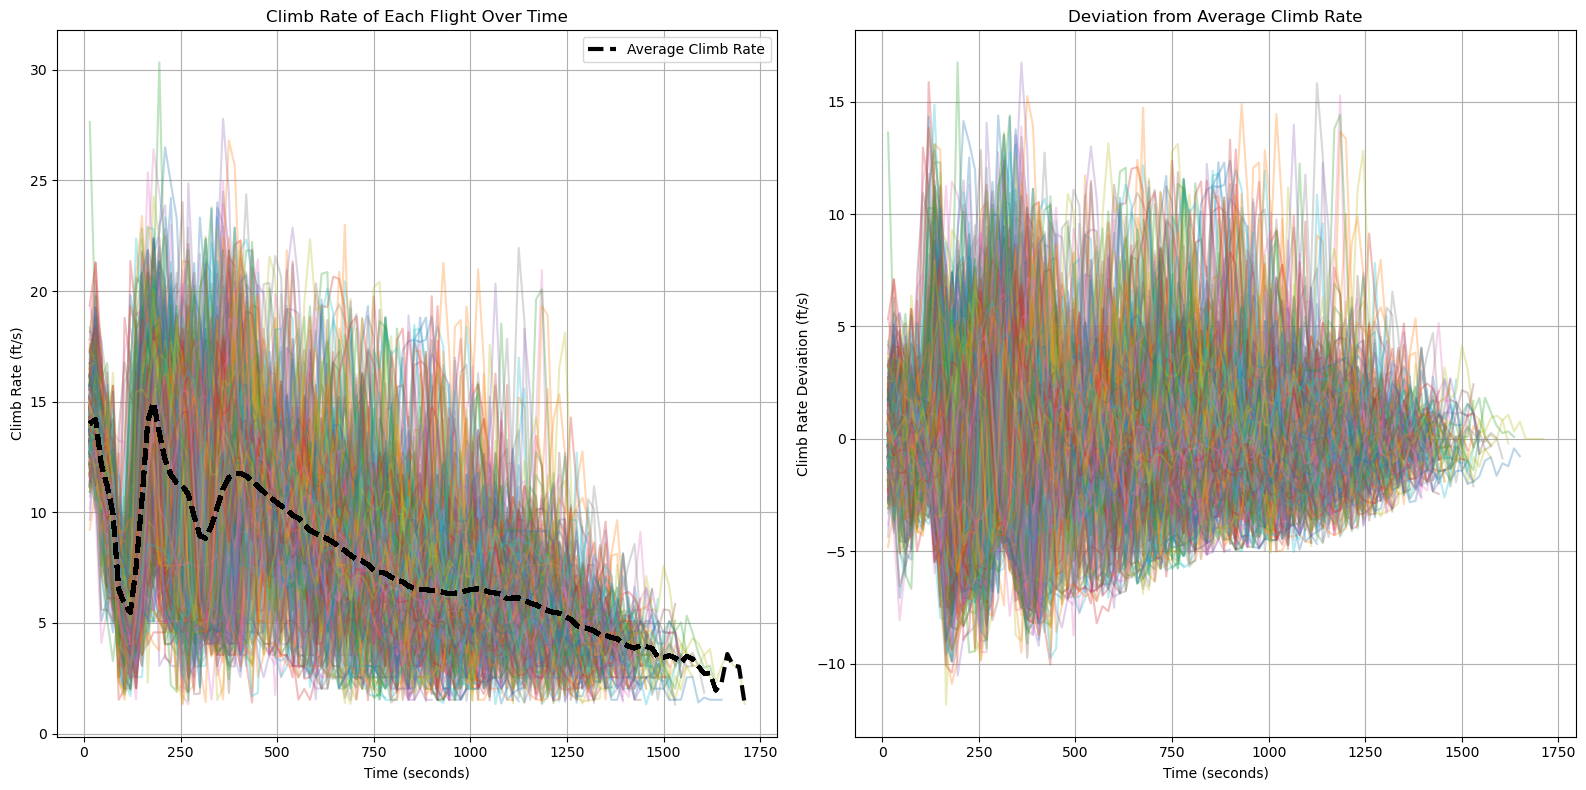

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure timestep and baroaltitude are numeric
df['timestep'] = pd.to_numeric(df['timestep'], errors='coerce')
df['baroaltitude'] = pd.to_numeric(df['baroaltitude'], errors='coerce')

# Drop rows with missing or invalid values in timestep or baroaltitude
df = df.dropna(subset=['timestep', 'baroaltitude'])

# Sort the data by time for each segment (flight)
df = df.sort_values(by=['segment', 'timestep'])

# Calculate climb rate (change in altitude over change in time) for each flight (segment)
df['climb_rate'] = df.groupby('segment')['baroaltitude'].diff() / df.groupby('segment')['timestep'].diff()

# Calculate the average climb rate across all flights
df['avg_climb_rate'] = df.groupby('timestep')['climb_rate'].transform('mean')

# Calculate the deviation from the average climb rate for each flight
df['climb_rate_deviation'] = df['climb_rate'] - df['avg_climb_rate']

# Prepare the figure for two plots (1 row, 2 columns)
plt.figure(figsize=(16, 8))

# Plot 1: Climb Rate of Each Flight
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
for segment, group in df.groupby('segment'):
    plt.plot(group['timestep'], group['climb_rate'], alpha=0.3)  # Add transparency
# Plot the average climb rate with a label and emphasis
plt.plot(df['timestep'], df['avg_climb_rate'], color='black', linestyle='--', linewidth=3, label='Average Climb Rate')
# Add labels, title, grid, and legend (only for the average climb rate)
plt.xlabel('Time (seconds)')
plt.ylabel('Climb Rate (ft/s)')
plt.title('Climb Rate of Each Flight Over Time')
plt.grid(True)
plt.legend()

# Plot 2: Deviation from Average Climb Rate
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
for segment, group in df.groupby('segment'):
    plt.plot(group['timestep'], group['climb_rate_deviation'], alpha=0.3)  # Add transparency
# Add labels, title, and grid
plt.xlabel('Time (seconds)')
plt.ylabel('Climb Rate Deviation (ft/s)')
plt.title('Deviation from Average Climb Rate')
plt.grid(True)

# Adjust the layout
plt.tight_layout()

# Show both plots
plt.show()



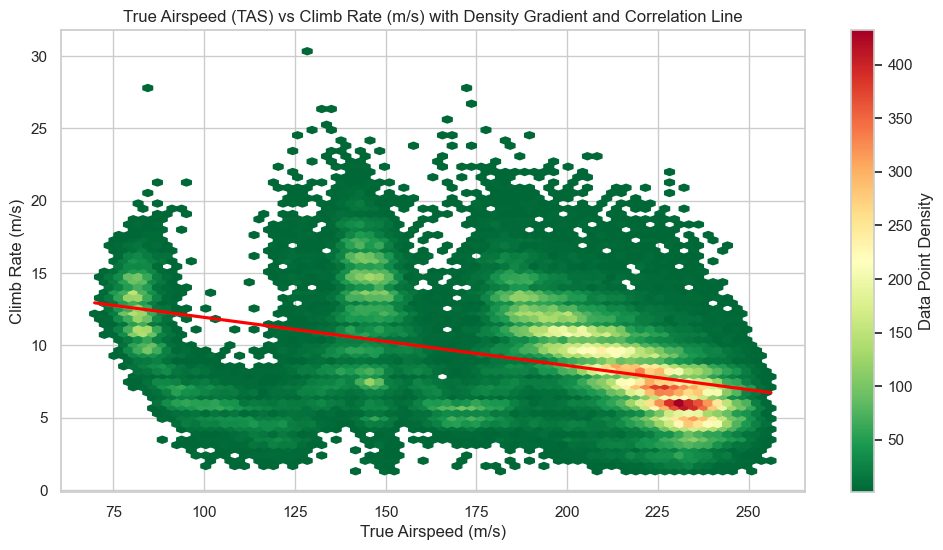

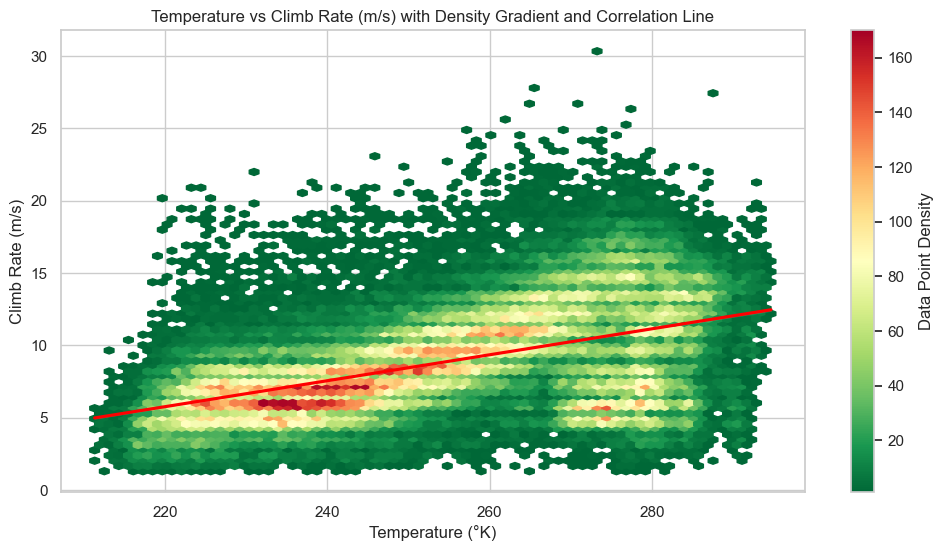

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert climb rate from ft/s to m/s
df['climb_rate_ms'] = df['climb_rate']

# Set the style for better visual clarity
sns.set(style="whitegrid")

#True Airspeed vs Climb Rate in m/s with Density Color Gradient
plt.figure(figsize=(12, 6))
# Use hexbin for density plot with a color gradient from green to red, and smaller hexagons
plt.hexbin(df['tas'], df['climb_rate_ms'], gridsize=70, cmap='RdYlGn_r', mincnt=1)  # Adjust gridsize for smaller hexagons
plt.colorbar(label='Data Point Density')
sns.regplot(x='tas', y='climb_rate_ms', data=df, scatter=False, line_kws={'color':'red'})
plt.title('True Airspeed (TAS) vs Climb Rate (m/s) with Density Gradient and Correlation Line')
plt.xlabel('True Airspeed (m/s)')
plt.ylabel('Climb Rate (m/s)')
plt.grid(True)
plt.show()

#Temperature vs Climb Rate in m/s with Density Color Gradient
plt.figure(figsize=(12, 6))
# Use hexbin for density plot with a color gradient from green to red, and smaller hexagons
plt.hexbin(df['temp'], df['climb_rate_ms'], gridsize=70, cmap='RdYlGn_r', mincnt=1)  # Adjust gridsize for smaller hexagons
plt.colorbar(label='Data Point Density')
sns.regplot(x='temp', y='climb_rate_ms', data=df, scatter=False, line_kws={'color':'red'})
plt.title('Temperature vs Climb Rate (m/s) with Density Gradient and Correlation Line')
plt.xlabel('Temperature (°K)')
plt.ylabel('Climb Rate (m/s)')
plt.grid(True)
plt.show()
